In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#path to data
path = 'data/'
start_date = '2014-10-08'
end_date = '2024-08-27'

In [3]:
#portfolio to assess in the portfolio analysis
market = 'NASDAQ_COMP'
portfolio = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMGN', 'INTC', market]

In [4]:
df = pd.DataFrame(columns=['date'])

for ticker in portfolio:
    data = pd.read_csv(path+ticker+'.csv')
    print(data.shape)
    df = pd.merge(df, data[['date', 'close']], on='date', how='outer', suffixes=(ticker, ticker))

#rename column names with Ticker values
df.columns = ['date'] + [i for i in portfolio]


(11019, 6)
(3566, 6)
(5040, 6)
(9692, 6)
(10384, 6)
(13265, 6)
(2527, 6)


In [5]:
#convert dates to datetime
df['date'] = pd.to_datetime(df['date'])

#sort dates
df = df.sort_values(by='date')

# Reset the index
df.reset_index(drop=True, inplace=True)

#drop any rows with NaNs
#df = df.dropna()

#filter data from start and end dates
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [6]:
df

,date,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,NASDAQ_COMP
10777,2014-10-08,22.5851,17.2853,29.1870,40.5723,111.848,27.0889,4468.59
10778,2014-10-09,22.6330,17.1340,28.5405,39.7691,109.853,26.5752,4378.34
10779,2014-10-10,22.5732,15.7940,27.7595,38.1857,109.697,25.2222,4276.24
10780,2014-10-13,22.3638,14.9727,27.2375,37.8551,106.628,24.8755,4213.66
10781,2014-10-14,22.1265,15.1373,27.4345,37.9286,105.561,25.4069,4227.17
...,...,...,...,...,...,...,...,...
13271,2024-08-21,226.4000,223.2700,165.8500,424.1400,329.150,21.4100,17918.99
13272,2024-08-22,224.5300,210.6600,163.8200,415.7800,324.720,20.1200,17619.35
13273,2024-08-23,226.8400,220.3200,165.6200,416.7900,328.800,20.5400,17877.79
13274,2024-08-26,227.2200,213.2350,166.1600,413.6100,326.900,20.1400,17725.76


<Axes: >

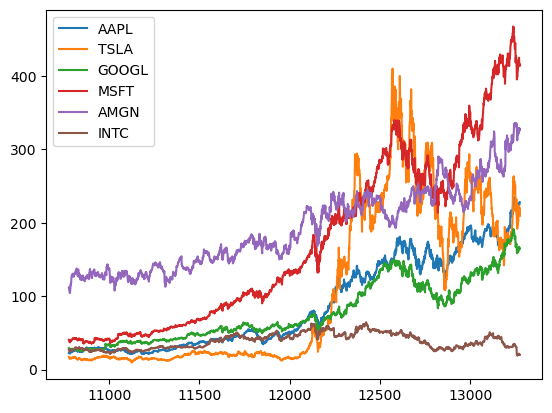

In [7]:
df[portfolio[:-1]].plot()

# Daily Rate of Returns

In [8]:
df_daily_ROR = pd.DataFrame()
df_daily_ROR[portfolio] = (df[portfolio].diff()/df[portfolio].shift(1))*100
df_daily_ROR['date'] = df['date']


<Axes: >

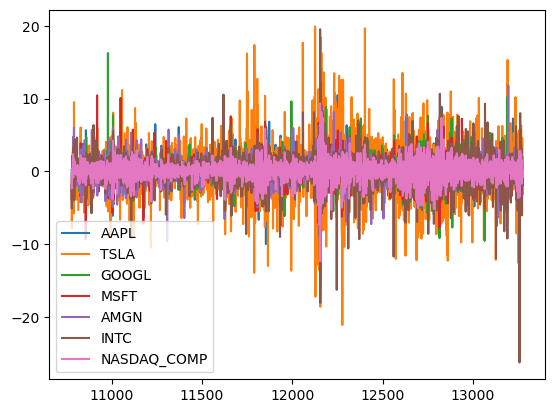

In [9]:
df_daily_ROR[portfolio].plot()

In [10]:
df

,date,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,NASDAQ_COMP
10777,2014-10-08,22.5851,17.2853,29.1870,40.5723,111.848,27.0889,4468.59
10778,2014-10-09,22.6330,17.1340,28.5405,39.7691,109.853,26.5752,4378.34
10779,2014-10-10,22.5732,15.7940,27.7595,38.1857,109.697,25.2222,4276.24
10780,2014-10-13,22.3638,14.9727,27.2375,37.8551,106.628,24.8755,4213.66
10781,2014-10-14,22.1265,15.1373,27.4345,37.9286,105.561,25.4069,4227.17
...,...,...,...,...,...,...,...,...
13271,2024-08-21,226.4000,223.2700,165.8500,424.1400,329.150,21.4100,17918.99
13272,2024-08-22,224.5300,210.6600,163.8200,415.7800,324.720,20.1200,17619.35
13273,2024-08-23,226.8400,220.3200,165.6200,416.7900,328.800,20.5400,17877.79
13274,2024-08-26,227.2200,213.2350,166.1600,413.6100,326.900,20.1400,17725.76


In [11]:
df_daily_ROR

,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,NASDAQ_COMP,date
10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-08
10778,0.212087,-0.875310,-2.215027,-1.979676,-1.783671,-1.896349,-2.019653,2014-10-09
10779,-0.264216,-7.820707,-2.736462,-3.981483,-0.142008,-5.091213,-2.331934,2014-10-10
10780,-0.927649,-5.200076,-1.880437,-0.865769,-2.797706,-1.374583,-1.463435,2014-10-13
10781,-1.061090,1.099334,0.723268,0.194161,-1.000675,2.136238,0.320624,2014-10-14
...,...,...,...,...,...,...,...,...
13271,-0.048563,0.984654,-0.804450,-0.155367,0.182621,2.000953,0.572770,2024-08-21
13272,-0.825972,-5.647870,-1.223998,-1.971047,-1.345891,-6.025222,-1.672192,2024-08-22
13273,1.028816,4.585588,1.098767,0.242917,1.256467,2.087475,1.466796,2024-08-23
13274,0.167519,-3.215777,0.326048,-0.762974,-0.577859,-1.947420,-0.850385,2024-08-26


# Mean and Covariance of Returns

In [12]:
mean_daily_returns, covar_daily_returns = pd.DataFrame(), pd.DataFrame()

In [13]:
mean_daily_returns = df_daily_ROR.mean(axis=0)
covar_daily_returns[portfolio] = df_daily_ROR[portfolio].cov()

In [14]:
mean_daily_returns

AAPL                                0.107902
TSLA                                0.160526
GOOGL                               0.084493
MSFT                                0.105763
AMGN                                0.054093
INTC                                0.011555
NASDAQ_COMP                         0.064258
date           2019-09-09 18:52:52.148859392
dtype: object

In [15]:
covar_daily_returns

#the diagonal represents the variance of market returns or the volatility. This is a measure of how much the stock price varies w.r.t. the stock average daily returns

,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,NASDAQ_COMP
AAPL,3.242827,2.748514,1.955287,2.112575,1.101872,1.984290,1.939645
TSLA,2.748514,12.613681,2.328382,2.473484,1.079256,2.548144,2.635140
GOOGL,1.955287,2.328382,3.194411,2.196766,1.006498,1.826025,1.875324
MSFT,2.112575,2.473484,2.196766,2.944963,1.118407,2.095842,1.946314
AMGN,1.101872,1.079256,1.006498,1.118407,2.458170,1.233372,1.066559
INTC,1.984290,2.548144,1.826025,2.095842,1.233372,4.872780,1.918770
NASDAQ_COMP,1.939645,2.635140,1.875324,1.946314,1.066559,1.918770,1.796255


# Financial Elasticity (Beta)

In [16]:
beta = pd.Series(covar_daily_returns[market])/df_daily_ROR[market].var(axis=0)

In [17]:
beta

AAPL           1.079827
TSLA           1.467019
GOOGL          1.044019
MSFT           1.083540
AMGN           0.593768
INTC           1.068206
NASDAQ_COMP    1.000000
Name: NASDAQ_COMP, dtype: float64

# Portfolio Risk & Returns

In [18]:
#investment weights (must sum to 1)
w = data =[.1, .2, .1, .2, 0.2, 0.2]


In [19]:
stocks = portfolio[:-1] #always put market index as last entry in portfolio 

n = len(stocks) #number of stocks
trading_days = 251 #number of trading days

In [20]:
beta[:n].to_list()

[1.0798270609622505,
 1.4670185868149597,
 1.0440186918958183,
 1.0835400316809356,
 0.593767966775642,
 1.068205771568767]

In [21]:
mean_daily_returns[:n].to_list()

[0.10790209648277078,
 0.16052627415523618,
 0.08449301923111063,
 0.10576299746335385,
 0.05409333613728726,
 0.011555276596729733]

In [22]:
import numpy as np

portfolio_daily_return = np.matmul(w, mean_daily_returns[:n].to_list()).sum()

In [23]:
annualized_portfolio_return = portfolio_daily_return * trading_days
annualized_portfolio_return

21.492399198919298

In [24]:
portfolio_risk = np.sqrt(np.matmul(np.matmul(w, covar_daily_returns.iloc[:-1, :-1].to_numpy()), np.transpose(w)))


In [25]:
annualized_portfolio_risk = np.sqrt(trading_days*np.matmul(np.matmul(w, covar_daily_returns.iloc[:-1, :-1].to_numpy()), np.transpose(w)))
annualized_portfolio_risk

24.925086101532607

# Diversification Index

In [26]:
diver_index = np.matmul(df_daily_ROR[stocks].std().to_numpy(), np.transpose(w))/np.sqrt(np.matmul(w, np.matmul(covar_daily_returns.iloc[:-1, :-1].to_numpy(), np.transpose(w))))
diver_index

1.3776505062850795

# K-Means Clustering

In [27]:
mean_daily_returns[stocks].to_numpy().reshape(len(w), 1)

array([[0.10790209648277078],
       [0.16052627415523618],
       [0.08449301923111063],
       [0.10576299746335385],
       [0.05409333613728726],
       [0.011555276596729733]], dtype=object)

In [28]:
covar_daily_returns.iloc[:-1, :-1].to_numpy()

array([[ 3.2428268 ,  2.74851387,  1.95528705,  2.11257456,  1.10187212,
         1.98428961],
       [ 2.74851387, 12.61368115,  2.32838193,  2.47348383,  1.07925571,
         2.54814398],
       [ 1.95528705,  2.32838193,  3.19441063,  2.19676575,  1.00649808,
         1.82602546],
       [ 2.11257456,  2.47348383,  2.19676575,  2.94496289,  1.11840692,
         2.09584176],
       [ 1.10187212,  1.07925571,  1.00649808,  1.11840692,  2.45817038,
         1.23337245],
       [ 1.98428961,  2.54814398,  1.82602546,  2.09584176,  1.23337245,
         4.87277983]])

In [70]:
from sklearn.cluster import KMeans

#set seed for repeatability
np.random.seed(100)
num_clusters = 3

#use mean return and covariance as input features for KMeans clusters
features = np.concatenate([mean_daily_returns[stocks].to_numpy().reshape(len(w), 1), covar_daily_returns.iloc[:-1, :-1].to_numpy()], axis=1)
cluster = KMeans(algorithm='lloyd', max_iter=100, n_clusters=num_clusters)
cluster.fit(features)


centroids = cluster.cluster_centers_
labels = cluster.labels_
print('Centroids:\n', centroids)
print('Labels:\n', labels)

Centroids:
 [[8.80628623e-02 2.10314013e+00 2.15740883e+00 2.08824038e+00
  2.09317753e+00 1.42123687e+00 1.78488232e+00]
 [1.60526274e-01 2.74851387e+00 1.26136811e+01 2.32838193e+00
  2.47348383e+00 1.07925571e+00 2.54814398e+00]
 [1.15552766e-02 1.98428961e+00 2.54814398e+00 1.82602546e+00
  2.09584176e+00 1.23337245e+00 4.87277983e+00]]
Labels:
 [0 1 0 0 0 2]


In [93]:
from operator import itemgetter
for i in range(num_clusters):
    print('Cluster', i)
    index = np.where(labels == i)[0]
    print(itemgetter(*index)(stocks))
    

Cluster 0
('AAPL', 'GOOGL', 'MSFT', 'AMGN')
Cluster 1
TSLA
Cluster 2
INTC


('TSLA', 'MSFT')
